##### What is a Monte Carlo Simulation?

###### Informally 
    Simulate a random process and see what happens
    
###### Formally
Express an unknown quantity µ as the solution
$$ µ = E(f(X)), X ∼ p $$ 

$$ =\int_x f(x)p(x) dx$$
ie estimate µ as a avg_mean(expected value) of different simulations.

Then take $X_1, .., X_n$ as iid with probability p.
$\hat{u} = \frac{1}{n} \sum_{i=1}^{n}f(X_i)$


So take X's from the population and take a weighted avg of X's to get your µ

#### Uses

Monte Carlo is used to assess risk, eg stock.


##### Monte Carlo for stock prediction
    If we want to buy a particular stock we may like to try to look into the future to estimate.

1. What kind of returns would we get with what probability -> the expected value of return $\mu$ 
        
2. Volatility of stocks -> vol
    
Data : Historic data of stock prices

In [2]:
# loading libraries

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [3]:
# get data
apple =pd.read_csv('/Users/Asmita/Documents/USF/Fall_Mod_1/MSAN692/msan692/data/AAPL.csv', parse_dates=['Date'])

In [4]:
apple = apple[apple.Date.dt.year >= 2000]

In [5]:
# calculate the compound annual growth rate (CAGR) which 
# will give us our mean return input (mu)

days = apple.shape[0]
cagr = (apple.iloc[0]['Adj Close'] - apple.iloc[-1]['Adj Close'])**(365.0/days) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

('CAGR =', '50.08%')


In [6]:
#create a series of percentage returns and calculate 
#the annual volatility of returns
import numpy as np

apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std()*np.sqrt(252) # 252 is the number of trading days
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

('Annual Volatility =', '48.84%')


In [7]:
#Define Variables
S = apple.iloc[-1]['Adj Close'] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.5008 #Return
vol = 0.4884 #Volatility

In [8]:
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

# mu/T = mean return
# vol/math.sqrt(T) = standard error of the return
# T = number of return

In [15]:
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)

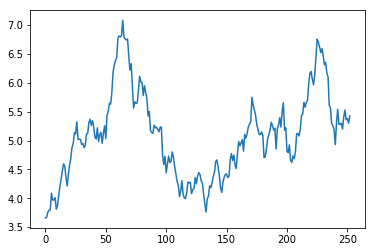

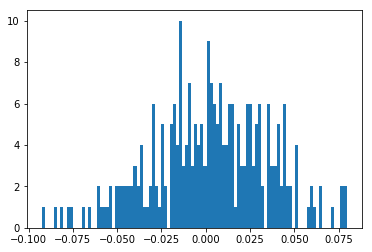

In [16]:
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()


    This code is a single simulation of daily returns over 252 days.
    
    1. take the annual growth rate 
    2. take the starting price
    3. project the growth as starting_price * growth_rate
    4. plot this
    
    For monte carlo, we should resimulate it many times as see patterns
    Simulate this 1000 times and check the price patterns

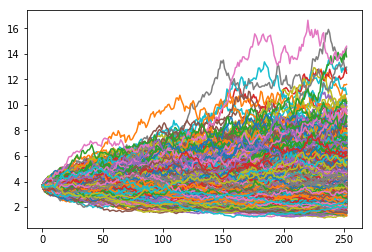

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = apple.iloc[-1]['Adj Close'] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1

    #set starting price and create price series generated by above random daily returns
    price_list = [S]

    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
# show the plot of multiple price series created above
plt.show()

    Final price spread is quite large.
    Append the final price in a list and check histogram of what happens

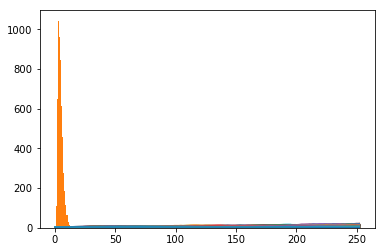

In [22]:
#Define Variables
S = apple.iloc[-1]['Adj Close'] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
result = [] 
    
#choose number of runs to simulate - I have chosen 10000 this time
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1

    #set starting price and create price series generated by above random daily returns
    price_list = [S]

    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
    


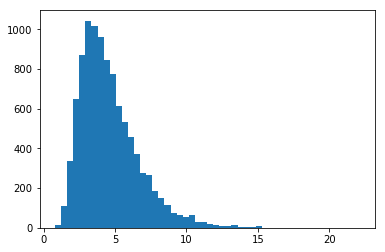

In [26]:
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [23]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

4.64


In [24]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))


('5% quantile =', 2.1099838729166338)
('95% quantile =', 8.5577926121818546)


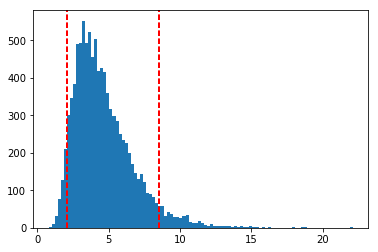

In [25]:

plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

    So in monte carlo,  we estimate a quantity using mean and standard deviation
    here we were estimating the price on the last day
    
    we got a random value from the normal distribution given mean and standard error (std/sqrt(n))
    repeat this estimation 1000 or 10000 times.
    draw histogram of the estimated value
    get mean from this histogram
    get confidence interval (using percentile) from this histogram.
    
    This is our simulated estimate using monte carlo 